Data preview:
           Date       Open       High        Low     Close* Adj Close**  \
0  Apr 28, 2023  33,797.43  34,104.56  33,728.40  34,098.16   34,098.16   
1  Apr 27, 2023  33,381.66  33,859.75  33,374.65  33,826.16   33,826.16   
2  Apr 26, 2023  33,596.34  33,645.83  33,235.85  33,301.87   33,301.87   
3  Apr 25, 2023  33,828.34  33,875.49  33,525.39  33,530.83   33,530.83   
4  Apr 24, 2023  33,805.04  33,891.15  33,726.09  33,875.40   33,875.40   

        Volume  
0  354,310,000  
1  343,240,000  
2  321,170,000  
3  297,880,000  
4  252,020,000  

Columns in dataset:
Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')
Mean Squared Error: 4797598.182605217
R-squared: 0.6851447206941936
Predicted stock price on 2023-05-08: 35351.05328959883


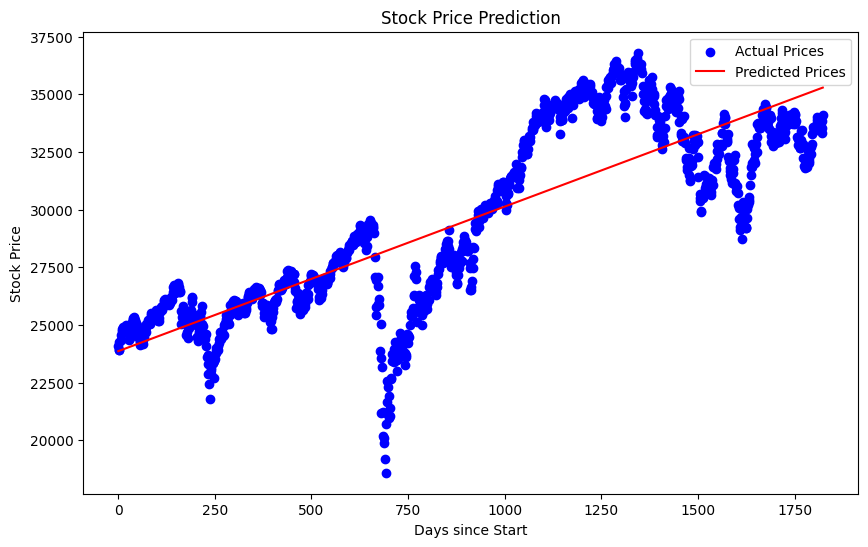

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "stock2018-2023.csv"  # Replace with the path to your file
data = pd.read_csv(file_path)

# Display the first few rows and column names
print("Data preview:")
print(data.head())
print("\nColumns in dataset:")
print(data.columns)

# Specify the column for stock prices
# Update with the correct column name if 'Close' doesn't exist
price_column = 'Close*'  # Replace with the actual column name for stock prices
if price_column not in data.columns:
    raise KeyError(f"Column '{price_column}' not found. Available columns are: {list(data.columns)}")

# Ensure the 'Date' column is a datetime object and sort the data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Extract features and target
data['Days'] = (data['Date'] - data['Date'].min()).dt.days  # Days since start date
X = data[['Days']].values  # Independent variable
data[price_column] = pd.to_numeric(data[price_column].str.replace(',', ''), errors='coerce')
y = data[price_column].values   # Dependent variable (stock prices)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # create an instance of the imputer
X = imputer.fit_transform(X) #fit and transform X
y = imputer.fit_transform(y.reshape(-1, 1)).flatten() #fit and transform y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict future stock price (e.g., 10 days from the last date)
future_days = 10
last_date = data['Date'].max()
future_date = last_date + pd.Timedelta(days=future_days)
future_value = model.predict([[data['Days'].max() + future_days]])

print(f"Predicted stock price on {future_date.date()}: {future_value[0]}")

# Plot the data and predictions
plt.figure(figsize=(10, 6))
plt.scatter(data['Days'], y, color='blue', label='Actual Prices')
plt.plot(data['Days'], model.predict(X), color='red', label='Predicted Prices')
plt.xlabel('Days since Start')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()